In [1]:
import numpy as np
import scipy as sp
%matplotlib inline
import matplotlib.pyplot as plt # side-stepping mpl backend

In [2]:
# open docs file and read its lines
with open("data/qa/docs.txt", "r") as fh:
    lines = fh.readlines()  

In [3]:
# double-check we got all docs
len(lines)

60

In [4]:
# transform docs into lists of words
docs = [l.split() for l in lines]
print("Number of docs: %d." % len(docs))
print("Number of words: %d." % np.sum([len(d) for d in docs]))

Number of docs: 60.
Number of words: 278845.


In [5]:
# get a frequency count for all words in the corpus
words = {}
for d in docs:
    for w in d:
        if w not in words:
            words[w] = 1
        else:
            words[w] += 1
print("Number of unique words: %d." % len(words))

Number of unique words: 50100.


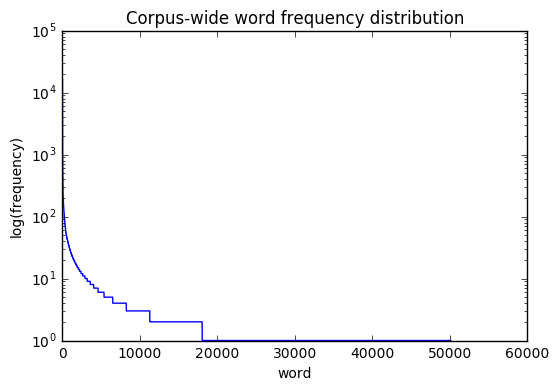

In [6]:
# plot the distribution of corpus-wide word counts
plt.plot(sorted(words.values(), reverse=True))
plt.xlabel('word')
plt.ylabel('log(frequency)')
plt.yscale('log')
plt.title('Corpus-wide word frequency distribution')

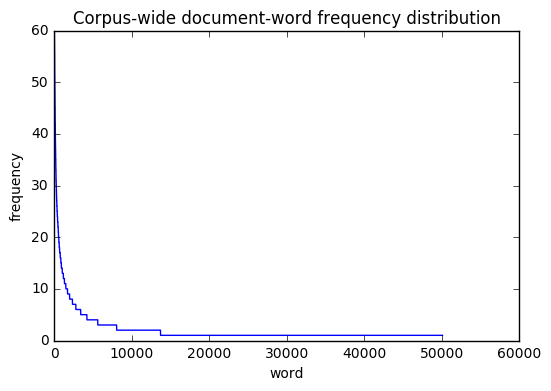

In [7]:
from collections import defaultdict
# document word frequency
df = defaultdict(int)
for d in docs:
    for w in set(d):
        df[w] += 1
plt.plot(sorted(df.values(), reverse=True))
plt.xlabel('word')
plt.ylabel('frequency')
plt.title('Corpus-wide document-word frequency distribution')

In [8]:
def getWf(docs, plot=True, logscale=True):
    r"""Get collection-wide word frequencies and optionally plot them."""
    words = defaultdict(int)
    for d in docs:
        for w in d:
            words[w] += 1
    if plot is True:
        plt.plot(sorted(words.values(), reverse=True))
        plt.xlabel('word')
        plt.ylabel('frequency')
        if logscale is True:
            plt.yscale('log')
            plt.ylabel('log(frequency)')
        plt.title('Corpus-wide word frequency distribution')
        plt.show()
    return words

In [9]:
def getDf(docs, plot=True, logscale=False):
    r"""Get collection-wide word frequencies and optionally plot them."""
    # document word frequency
    df = defaultdict(int)
    for d in docs:
        for w in set(d):
            df[w] += 1
    if plot is True:
        plt.plot(sorted(df.values(), reverse=True))
        plt.xlabel('word')
        plt.ylabel('frequency')
        if logscale is True:
            plt.yscale('log')
            plt.ylabel('log(frequency)')
        plt.title('Corpus-wide document-word frequency distribution')
        plt.show()
    return df

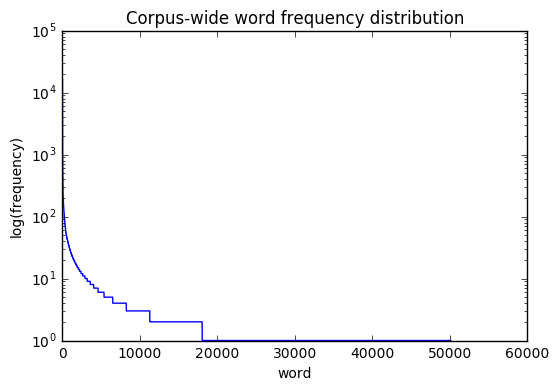

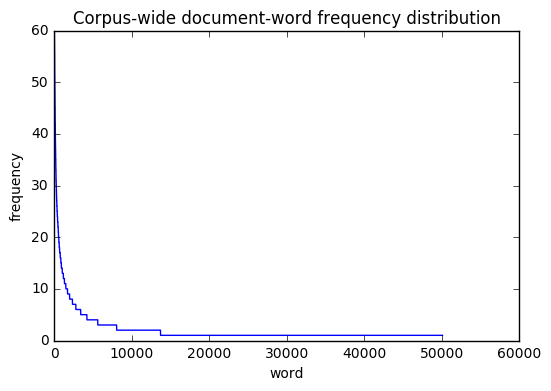

In [10]:
_ = getWf(docs)
_ = getDf(docs)